In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# 1. Load the dataset

df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
# 2. EDA and Preprocessing
print("Data Info:")
print(df.info())
print("\nData Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFuel Type Distribution:")
print(df['Fuel_Type'].value_counts())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Data Description:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.

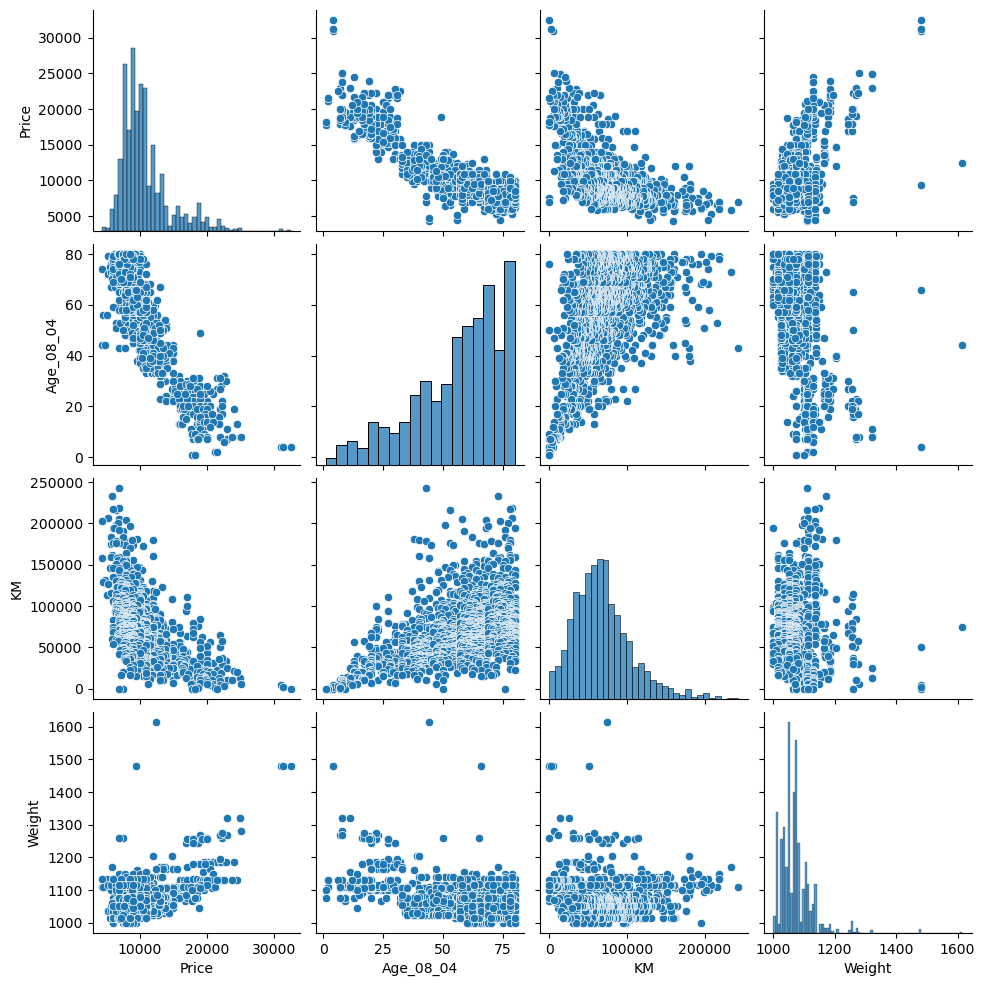

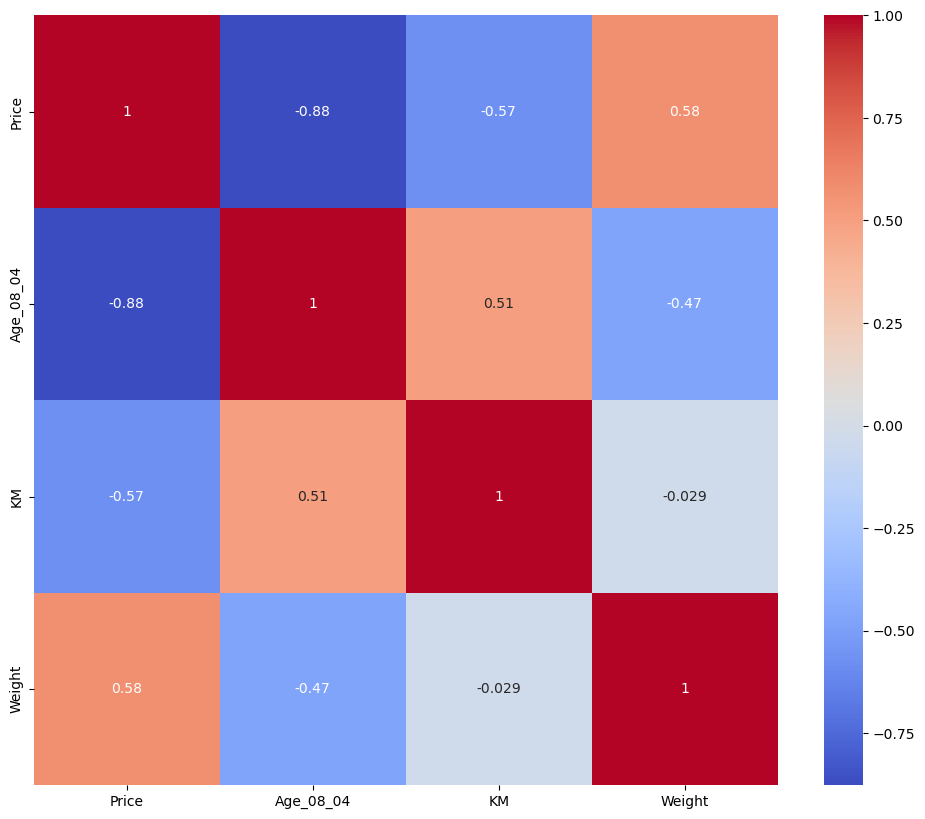

In [4]:
# Visualization
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'Weight']])
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Price', 'Age_08_04', 'KM', 'Weight']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
# One-Hot Encode Categorical Variables
categorical_cols = ['Fuel_Type', 'Automatic', 'Doors']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = ohe.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(categorical_cols))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(categorical_cols, axis=1)

In [6]:
# Feature Selection and VIF for numerical features
numerical_features = ['Age_08_04', 'KM', 'Weight']
X_numerical = df[numerical_features]
vif_data = pd.DataFrame()
vif_data["feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(len(X_numerical.columns))]
print("\nVIF for Numerical Features:")
print(vif_data)


VIF for Numerical Features:
     feature        VIF
0  Age_08_04  11.905044
1         KM   5.884278
2     Weight   8.855622


In [7]:
# Prepare features and target
features = numerical_features + list(encoded_df.columns)
X = df[features]
y = df['Price']

In [8]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 5. Model Building and Evaluation


In [11]:
# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print("\nModel 1 (Linear Regression)")
print(f"MSE: {mse1}, R2: {r2_1}")

# Interpret Coefficients (Linear Regression)
print("\nLinear Regression Coefficients:")
coefficients1 = pd.DataFrame(model1.coef_, index=X_train.columns, columns=['Coefficient'])
print(coefficients1)


Model 1 (Linear Regression)
MSE: 2443523.6038555386, R2: 0.816865601900838

Linear Regression Coefficients:
                  Coefficient
Age_08_04        -2239.726995
KM                -592.735475
Weight            1542.514852
Fuel_Type_Diesel  -229.415507
Fuel_Type_Petrol   521.228766
Automatic_1        -25.188577
Doors_3           -223.974073
Doors_4            -39.883908
Doors_5           -345.733339


In [12]:
# Model 2: Polynomial Regression (degree=2)
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_scaled)
X_test_poly2 = poly2.transform(X_test_scaled)
model2 = LinearRegression()
model2.fit(X_train_poly2, y_train)
y_pred2 = model2.predict(X_test_poly2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print("\nModel 2 (Polynomial Regression, degree=2)")
print(f"MSE: {mse2}, R2: {r2_2}")

# Interpret Coefficients (Polynomial Regression - degree=3)
print("\nPolynomial Regression (degree=2) Coefficients:")
coefficients2 = pd.DataFrame(model2.coef_, index=poly2.get_feature_names_out(X_train.columns), columns=['Coefficient'])
print(coefficients2)



Model 2 (Polynomial Regression, degree=2)
MSE: 1939475.4635416667, R2: 0.8546424224904705

Polynomial Regression (degree=2) Coefficients:
                                    Coefficient
1                                  3.010597e+10
Age_08_04                         -2.960540e+12
KM                                -3.557935e+12
Weight                             8.813387e+12
Fuel_Type_Diesel                   6.688181e+14
Fuel_Type_Petrol                  -4.997378e+15
Automatic_1                        2.840706e+15
Doors_3                           -4.754005e+15
Doors_4                            1.002472e+15
Doors_5                           -4.421120e+15
Age_08_04^2                       -1.342500e+02
Age_08_04 KM                       3.566562e+02
Age_08_04 Weight                  -9.890625e+02
Age_08_04 Fuel_Type_Diesel         2.285156e+02
Age_08_04 Fuel_Type_Petrol        -1.208125e+02
Age_08_04 Automatic_1              1.357500e+02
Age_08_04 Doors_3                  8.413821e+

In [13]:
# Model 3: K-Nearest Neighbors (KNN) Regression (without Grid Search)
model3 = KNeighborsRegressor(n_neighbors=5, weights='distance')  # Use default or chosen parameters
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("\nModel 3 (K-Nearest Neighbors Regression)")
print(f"MSE: {mse3}, R2: {r2_3}")


Model 3 (K-Nearest Neighbors Regression)
MSE: 1686580.4644284493, R2: 0.8735961061675221


In [14]:
# Model 4: Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha if needed
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nModel 4 (Lasso Regression)")
print(f"MSE: {mse_lasso}, R2: {r2_lasso}")

# Interpret Coefficients (Lasso Regression)
print("\nLasso Regression Coefficients:")
coefficients4 = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['Coefficient'])
print(coefficients4)


Model 4 (Lasso Regression)
MSE: 2443041.955265928, R2: 0.816901699945651

Lasso Regression Coefficients:
                  Coefficient
Age_08_04        -2239.723332
KM                -592.738713
Weight            1541.978016
Fuel_Type_Diesel  -228.963484
Fuel_Type_Petrol   521.072231
Automatic_1        -25.028599
Doors_3           -186.302954
Doors_4            -17.478896
Doors_5           -307.609204


In [15]:
# Model 5: Ridge Regression
ridge = Ridge(alpha=0.1)  # We can Adjust alpha if needed
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nModel 5 (Ridge Regression)")
print(f"MSE: {mse_ridge}, R2: {r2_ridge}")

# Interpret Coefficients (Ridge Regression)
print("\nRidge Regression Coefficients:")
coefficients5 = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=['Coefficient'])
print(coefficients5)


Model 5 (Ridge Regression)
MSE: 2443276.630255272, R2: 0.8168841117943212

Ridge Regression Coefficients:
                  Coefficient
Age_08_04        -2239.511599
KM                -592.909109
Weight            1542.243773
Fuel_Type_Diesel  -229.439295
Fuel_Type_Petrol   520.875695
Automatic_1        -25.162398
Doors_3           -216.733560
Doors_4            -35.604840
Doors_5           -338.330547


1. What is Normalization & Standardization and how is it helpful?

Normalization:

- Normalization is a scaling technique that transforms numerical features to a specific range, typically between 0 and 1.   

- It's often done using the Min-Max scaling method:

- X_normalized = (X - X_min) / (X_max - X_min)
  
Helpfulness:

- Useful when features have different scales and you want to bring them to a common range.   

- Beneficial for algorithms sensitive to feature scales, like neural networks and K-nearest neighbors.   

- Preserves the original data distribution.


Standardization:

- Standardization scales numerical features to have a mean of 0 and a standard deviation of 1.   

- It's done using the Z-score method:

- X_standardized = (X - X_mean) / X_std

- 
Helpfulness:

- Useful when features have a Gaussian-like distribution.   

- Beneficial for algorithms that assume centered data, like linear regression and support vector machines.

- Makes features comparable by removing the influence of their original scales.   

- Less affected by outliers than normalization.

2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. It can lead to unstable and unreliable coefficient estimates. Here are techniques to address it:   

Variance Inflation Factor (VIF): 

- Calculates how much the variance of a coefficient is inflated due to multicollinearity.   
- Features with high VIF values (typically above 5 or 10) are considered problematic.   
- You can remove features with high VIF values.
- Correlation Matrix and Heatmap:
- Calculate the correlation matrix of independent variables.
- Visualize the correlations using a heatmap.   
- Identify pairs of highly correlated variables.
- Remove one variable from each highly correlated pair.
- 
Principal Component Analysis (PCA):

- Transforms the original features into a set of uncorrelated principal components.
- Reduces the dimensionality of the data and eliminates multicollinearity.
- However, the transformed features may be less interpretable.
- Regularization (Lasso and Ridge Regression):

Lasso (L1) Regression:

- Adds a penalty term to the loss function that shrinks the coefficients of less important features to zero.
- Performs feature selection and reduces multicollinearity.

Ridge (L2) Regression:

- Adds a penalty term that shrinks the coefficients towards zero but doesn't force them to be exactly zero.
- Reduces the impact of multicollinearity without eliminating features.

Feature Selection:

- Remove redundant features based on domain knowledge.
- Use statistical methods to select the most relevant features.
- Combine Correlated Variables:
- If two variables measure similar things, create a combined variable (e.g., their average).

Increase Sample Size:

- In some cases, increasing the sample size can reduce the impact of multicollinearity.

